In [526]:
import numpy as np
from scipy.cluster.vq import kmeans2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.stats import multivariate_normal

In [527]:
def pdf(x, mu, cov):
  dist =  multivariate_normal(mu, cov)
  return dist.pdf(x)

def inf(X,mu,cov,w):
  scores = []
  for i in range(3):
    scores.append(w[i]*pdf(X,mu[i],cov[i]))
  return scores.index(max(scores))

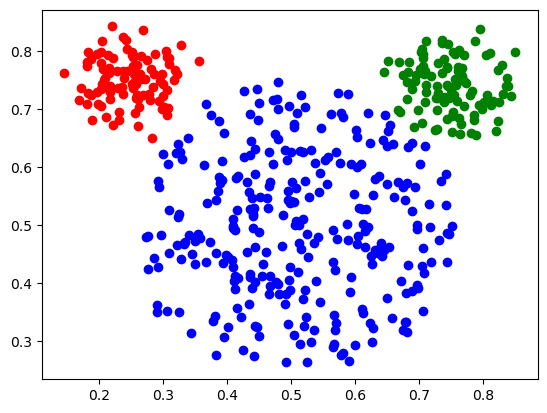

In [528]:
values = np.loadtxt('cluster.txt', comments = '#', delimiter = ' ', usecols = [0,1])
labels = np.loadtxt('cluster.txt', comments = '#', delimiter = ' ', usecols = [2], dtype = 'str')

cluster1 = values[labels == 'Head']
cluster2 = values[labels == 'Ear_right']
cluster3 = values[labels == 'Ear_left']

plt.scatter(cluster1[:,0], cluster1[:,1], label = 'Head', color = 'blue')
plt.scatter(cluster2[:,0], cluster2[:,1], label = 'Ear_Right', color = 'green')
plt.scatter(cluster3[:,0], cluster3[:,1], label = 'Ear_Left', color = 'red')
plt.show()

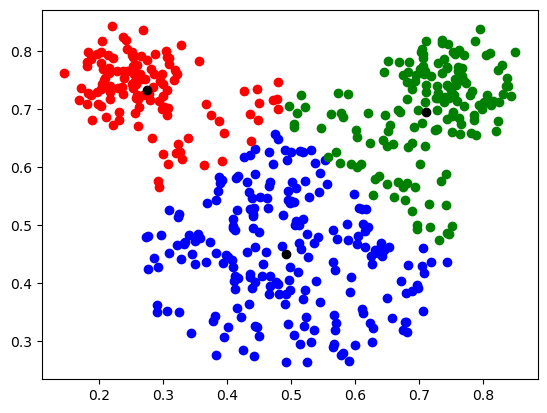

The Confusion Matrix is
[[100   0   0]
 [  0   0 100]
 [ 25 211  54]]


In [541]:
centroid, new_labels = kmeans2(values, 3, minit = 'points')

cluster1 = values[new_labels == 0]
cluster2 = values[new_labels == 1]
cluster3 = values[new_labels == 2]

pred_label = []
for i in new_labels:
  if(i==2):
    pred_label.append('Head')
  elif(i==1):
    pred_label.append('Ear_left')
  else:
    pred_label.append('Ear_right')

pred_label = np.array(pred_label)

plt.scatter(cluster1[:,0], cluster1[:,1], label = 'Head', color = 'blue')
plt.scatter(cluster2[:,0], cluster2[:,1], label = 'Ear_right', color = 'red')
plt.scatter(cluster3[:,0], cluster3[:,1], label = 'Ear_left', color = 'green')
plt.scatter(centroid[:,0], centroid[:,1], label = 'Centroid', color = 'black')
plt.show()

confusion_mat = confusion_matrix(labels, pred_label)
print("The Confusion Matrix is")
print(confusion_mat)

In [530]:
label1 = []
label2 = []
label3 = []

for i in pred_label:
  if (i=='Head'):
    label1.append([1,0,0])
  elif (i=='Ear_left'):
    label2.append([0,1,0])
  else:
    label3.append([0,0,1])

l1 = np.array(label1)
l2 = np.array(label2)
l3 = np.array(label3)

r = np.concatenate((label1,label2,label3), axis = 0)

In [531]:
gamma = r.copy()
mean = []
cov = []
wk = []

for i in range(3):
  mean.append((np.matmul(r[:,i].reshape(1,-1),values))/(np.sum(r[:,i])))
mean_np = np.concatenate(mean, axis = 0)

for i in range(3):
  sum1 = np.zeros((2,2))
  for j in range(490):
    sum1 = sum1 + r[j,i]*np.matmul((values[j] - mean_np[i]).reshape(-1,1),(values[j] - mean_np[i]).reshape(1,-1))
  cov.append(sum1.reshape(1,2,2)/np.sum(r[:,i]))
cov_np = np.concatenate(cov, axis=0)

for i in range(3):
  wk.append(np.sum(r[:,i])/490)
wk_np = np.array(wk)

In [532]:
# EM Algorithm
mean_iter = []
cov_iter = []
wk_iter = []
iters = 10

for i in range(iters):
  #E Step
  r_temp = np.zeros((490,3))
  for i in range(3):
    for j in range(490):
      r_temp[j, i] = wk_np[i]*pdf(values[j], mean_np[i], cov_np[i])
  r_temp = r_temp/(np.sum(r_temp, axis = 1)).reshape(-1,1)
  r = r_temp.copy()
  
  #M Step
  mean = []
  cov = []
  wk = []

  for i in range(3):
    mean.append((np.matmul(r[:,i].reshape(1,-1),values))/(np.sum(r[:,i])))
  mean_np = np.concatenate(mean, axis = 0)
  mean_iter.append(mean_np)

  for i in range(3):
    sum1 = np.zeros((2,2))
    for j in range(490):
      sum1 = sum1 + r[j,i]*np.matmul((values[j] - mean_np[i]).reshape(-1,1),(values[j] - mean_np[i]).reshape(1,-1))
    cov.append(sum1.reshape(1,2,2)/np.sum(r[:,i]))
  cov_np = np.concatenate(cov, axis=0)
  cov_iter.append(cov_np)

  for i in range(3):
    wk.append(np.sum(r[:,i])/490)
  wk_np = np.array(wk)  
  wk_iter.append(wk_np)

The confusion matrix for fourth iteration
[[100   0   0]
 [  0 100   0]
 [ 36  21 233]]


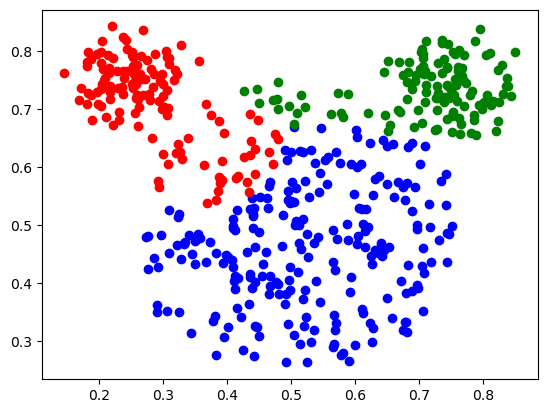

In [533]:
itr_list = []
for i in range(490):
  itr_list.append(inf(values[i],mean_iter[0],cov_iter[0],wk_iter[0]))

cluster_1 = values[np.array(itr_list) == 0]
cluster_2 = values[np.array(itr_list) == 1]
cluster_3 = values[np.array(itr_list) == 2]

pred_label = []
for i in itr_list:
  if(i==0):
    pred_label.append('Head')
  elif(i==1):
    pred_label.append('Ear_left')
  else:
    pred_label.append('Ear_right')

pred_label = np.array(pred_label)

confusion_mat = confusion_matrix(labels, pred_label)
print("The confusion matrix for fourth iteration")
print(confusion_mat)

plt.scatter(cluster_1[:,0], cluster_1[:,1], label = 'Head', color = 'blue')
plt.scatter(cluster_2[:,0], cluster_2[:,1], label = 'Ear_right', color = 'red')
plt.scatter(cluster_3[:,0], cluster_3[:,1], label = 'Ear_left', color = 'green')
plt.show()

The confusion matrix for fourth iteration
[[100   0   0]
 [  0 100   0]
 [ 42  24 224]]


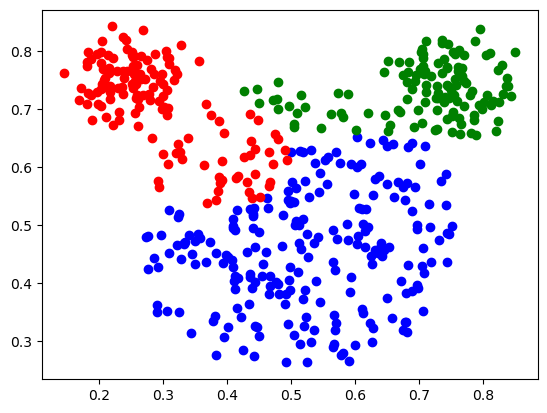

In [534]:
itr_list = []
for i in range(490):
  itr_list.append(inf(values[i],mean_iter[1],cov_iter[1],wk_iter[1]))

cluster_1 = values[np.array(itr_list) == 0]
cluster_2 = values[np.array(itr_list) == 1]
cluster_3 = values[np.array(itr_list) == 2]

pred_label = []
for i in itr_list:
  if(i==0):
    pred_label.append('Head')
  elif(i==1):
    pred_label.append('Ear_left')
  else:
    pred_label.append('Ear_right')

pred_label = np.array(pred_label)

confusion_mat = confusion_matrix(labels, pred_label)
print("The confusion matrix for fourth iteration")
print(confusion_mat)

plt.scatter(cluster_1[:,0], cluster_1[:,1], label = 'Head', color = 'blue')
plt.scatter(cluster_2[:,0], cluster_2[:,1], label = 'Ear_right', color = 'red')
plt.scatter(cluster_3[:,0], cluster_3[:,1], label = 'Ear_left', color = 'green')
plt.show()

The confusion matrix for fourth iteration
[[100   0   0]
 [  0 100   0]
 [ 42  24 224]]


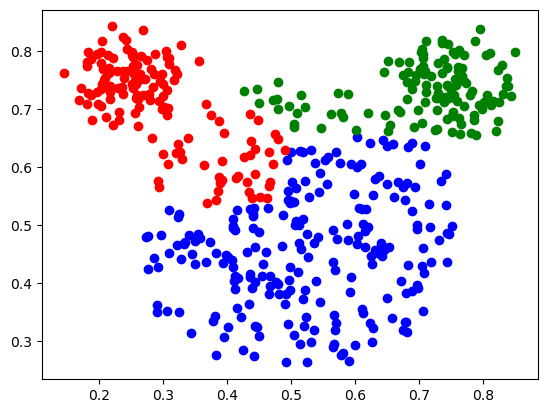

In [535]:
itr_list = []
for i in range(490):
  itr_list.append(inf(values[i],mean_iter[2],cov_iter[2],wk_iter[2]))

cluster_1 = values[np.array(itr_list) == 0]
cluster_2 = values[np.array(itr_list) == 1]
cluster_3 = values[np.array(itr_list) == 2]

pred_label = []
for i in itr_list:
  if(i==0):
    pred_label.append('Head')
  elif(i==1):
    pred_label.append('Ear_left')
  else:
    pred_label.append('Ear_right')

pred_label = np.array(pred_label)

confusion_mat = confusion_matrix(labels, pred_label)
print("The confusion matrix for fourth iteration")
print(confusion_mat)

plt.scatter(cluster_1[:,0], cluster_1[:,1], label = 'Head', color = 'blue')
plt.scatter(cluster_2[:,0], cluster_2[:,1], label = 'Ear_right', color = 'red')
plt.scatter(cluster_3[:,0], cluster_3[:,1], label = 'Ear_left', color = 'green')
plt.show()

The confusion matrix for fourth iteration
[[100   0   0]
 [  0 100   0]
 [ 68  27 195]]


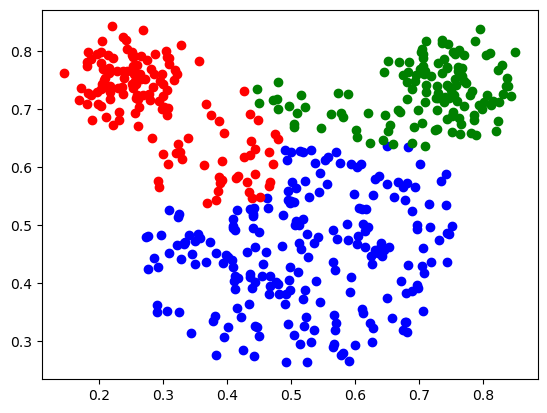

In [536]:
itr_list = []
for i in range(490):
  itr_list.append(inf(values[i],mean_iter[3],cov_iter[3],wk_iter[3]))

cluster_1 = values[np.array(itr_list) == 0]
cluster_2 = values[np.array(itr_list) == 1]
cluster_3 = values[np.array(itr_list) == 2]

pred_label = []
for i in itr_list:
  if(i==0):
    pred_label.append('Head')
  elif(i==1):
    pred_label.append('Ear_left')
  else:
    pred_label.append('Ear_right')

pred_label = np.array(l)

confusion_mat = confusion_matrix(labels, pred_label)
print("The confusion matrix for fourth iteration")
print(confusion_mat)

plt.scatter(cluster_1[:,0], cluster_1[:,1], label = 'Head', color = 'blue')
plt.scatter(cluster_2[:,0], cluster_2[:,1], label = 'Ear_right', color = 'red')
plt.scatter(cluster_3[:,0], cluster_3[:,1], label = 'Ear_left', color = 'green')
plt.show()

The confusion matrix for fourth iteration
[[100   0   0]
 [  0 100   0]
 [  9  11 270]]


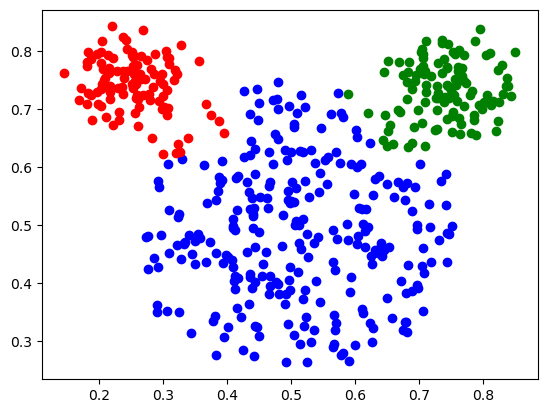

In [537]:
itr_list = []
for i in range(490):
  itr_list.append(inf(values[i],mean_iter[9],cov_iter[9],wk_iter[9]))

cluster_1 = values[np.array(itr_list) == 0]
cluster_2 = values[np.array(itr_list) == 1]
cluster_3 = values[np.array(itr_list) == 2]

pred_label = []
for i in itr_list:
  if(i==0):
    pred_label.append('Head')
  elif(i==1):
    pred_label.append('Ear_left')
  else:
    pred_label.append('Ear_right')

pred_label = np.array(pred_label)

confusion_mat = confusion_matrix(labels, pred_label)
print("The confusion matrix for fourth iteration")
print(confusion_mat)

plt.scatter(cluster_1[:,0], cluster_1[:,1], label = 'Head', color = 'blue')
plt.scatter(cluster_2[:,0], cluster_2[:,1], label = 'Ear_right', color = 'red')
plt.scatter(cluster_3[:,0], cluster_3[:,1], label = 'Ear_left', color = 'green')
plt.show()

The scatterring plot obtained in part (a) wrongly predicted 79 points which were labelled as 'Head' out of the 290 points labelled as Head. Only 211 points were correclty classified as note din the confusion matrix. Similarly Left and Right Ears were also incoorectly classified with Kmeans where the error rate was decreased with Gaussian Mixture Models (GMM).

We can see that the GMM correctly predicted 270 points out of 290 points that are "Heads" as Heads. Thus, GMM performs better as it uses both mean and covariance to assign clusters unlike kmeans which only uses Euclidean Distance as a measure to assign clusters. Furthermore, kmeans uses hard clustering and only uses spik-rical clusters whereas MM uses elliptical clusters and performs soft clustering.